This notebook is an analysis of predictive accuracy in relative free energy calculations from the Schrödinger JACS dataset:
> Wang, L., Wu, Y., Deng, Y., Kim, B., Pierce, L., Krilov, G., ... & Romero, D. L. (2015). Accurate and reliable prediction of relative ligand binding potency in prospective drug discovery by way of a modern free-energy calculation protocol and force field. Journal of the American Chemical Society, 137(7), 2695-2703.

http://doi.org/10.1021/ja512751q

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
# Read the Excel sheet
df = pd.read_excel('ja512751q_si_003.xlsx', sheet_name='dG')

In [3]:
# Delete rows with summary statistics
rows_to_drop = list()
for i, row in df.iterrows():
    if str(df.loc[i,'Ligand']) == 'nan':
        rows_to_drop.append(i)
print('dropping rows: {}'.format(rows_to_drop))
df = df.drop(index=rows_to_drop);

dropping rows: [36, 53, 75, 118, 153, 165, 182]


In [4]:
# Populate 'system' field for each entry
system = df.loc[0,'Systems']
for i, row in df.iterrows():
    if str(df.loc[i,'Systems']) == 'nan':
        df.loc[i, "Systems"] = system
    else:
        system = df.loc[i, "Systems"]

In [5]:
df

,Systems,Ligand,Exp. dG,Pred. dG,Pred. Error,Rel. dG,Unnamed: 6,Error,Error^2
0,BACE,CAT-4o,-9.38,-8.67,1.14,0.16,NaN,0.71,0.5041
1,BACE,CAT-13e,-9.96,-10.49,1.23,-1.66,NaN,0.53,0.2809
2,BACE,CAT-17b,-10.02,-10.91,1.18,-2.08,NaN,0.89,0.7921
3,BACE,CAT-13k,-9.70,-9.40,1.01,-0.57,NaN,0.30,0.0900
4,BACE,CAT-4m,-9.15,-8.50,1.01,0.33,NaN,0.65,0.4225
5,BACE,CAT-4b,-9.63,-10.22,1.17,-1.39,NaN,0.59,0.3481
6,BACE,CAT-4p,-10.08,-9.79,1.24,-0.96,NaN,0.29,0.0841
7,BACE,CAT-17f,-9.42,-10.45,1.05,-1.62,NaN,1.03,1.0609
8,BACE,CAT-4l,-9.34,-7.29,1.17,1.54,NaN,2.05,4.2025
9,BACE,CAT-13g,-9.09,-10.07,1.12,-1.24,NaN,0.98,0.9604


In [6]:
def bootstrap_sign_prediction(DeltaG_predicted, DeltaG_experimental, threshold, ci=0.95, nbootstrap = 1000):
    """Compute mean and confidence intervals for predicting correct sign.
    
    Parameters
    ----------
    DeltaG_predicted : numpy array with dimensions (Nligands,)
        Predicted free energies (kcal/mol)
    DeltaG_experimental : numpy array with dimensions (Nligands,)
        Experimental free energies (kcal/mol)
    threshold : float
        Threshold in free energy (kcal/mol)
    ci : float, optional, default=0.95
        Interval for CI
    nbootstrap : int, optional. default=10000
        Number of bootstrap samples
        
    Returns
    -------
    mean : float
        The mean statistic for the whole dataset
    stderr : float
        The standard error
    low, high : float
        Low and high ends of CI    
    """
    
    def compute_fraction(DeltaG_predicted, DeltaG_experimental, threshold):
        # Compute all differences
        N = len(DeltaG_predicted)        
        DDG_predicted = np.zeros([N*(N-1)], np.float64)
        DDG_experimental = np.zeros([N*(N-1)], np.float64)
        index = 0
        for i in range(N):
            for j in range(N):
                if i != j:
                    DDG_predicted[index] = (DeltaG_predicted[j] - DeltaG_predicted[i])
                    DDG_experimental[index] = (DeltaG_experimental[j] - DeltaG_experimental[i])
                    index += 1
        indices = np.where(np.abs(DDG_predicted) > threshold)[0]
        return np.sum(np.sign(DDG_predicted[indices]) == np.sign(DDG_experimental[indices])) / float(len(indices))
            
    N_ligands = len(DeltaG_predicted)
    fraction_n = np.zeros([nbootstrap], np.float64)
    for replicate in range(nbootstrap):
        bootstrapped_sample = np.random.choice(np.arange(N_ligands), size=[N_ligands])
        fraction_n[replicate] = compute_fraction(DeltaG_predicted[bootstrapped_sample], DeltaG_experimental[bootstrapped_sample], threshold)
        
    fraction_n = np.sort(fraction_n)
        
    fraction = compute_fraction(DeltaG_predicted, DeltaG_experimental, threshold)
    dfraction = np.std(fraction_n)
    
    low_frac = (1.0-ci)/2.0
    high_frac = 1.0 - low_frac
    fraction_low = fraction_n[int(np.floor(nbootstrap*low_frac))]
    fraction_high = fraction_n[int(np.ceil(nbootstrap*high_frac))]

    return fraction, dfraction, fraction_low, fraction_high

/Users/choderaj/miniconda/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


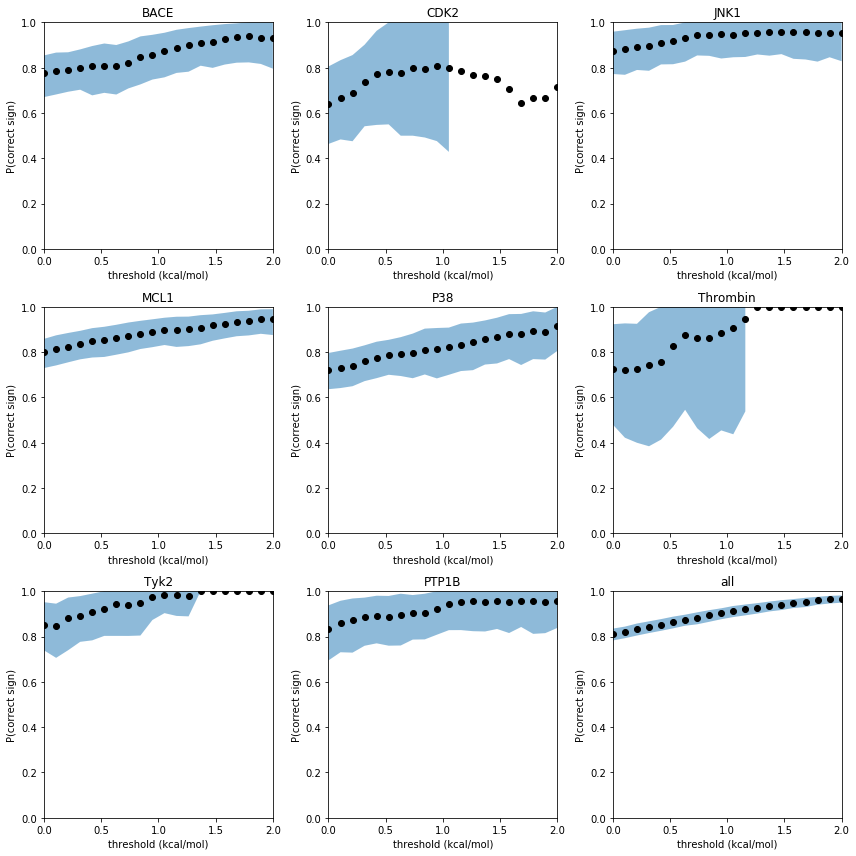

In [7]:
# Collect data by system
def plot_data(rows):
    DeltaG_experimental = rows['Exp. dG'].values
    DeltaG_predicted = rows['Pred. dG'].values
    plt.xlabel('threshold (kcal/mol)');
    plt.ylabel('P(correct sign)');

    [min_threshold, max_threshold] = [0, 2]
    thresholds = np.linspace(min_threshold, max_threshold, 20)
    fractions = thresholds * 0.0
    dfractions = thresholds * 0.0
    fractions_low = thresholds * 0.0
    fractions_high = thresholds * 0.0
    for index, threshold in enumerate(thresholds):
        fractions[index], dfractions[index], fractions_low[index], fractions_high[index] = bootstrap_sign_prediction(DeltaG_predicted, DeltaG_experimental, threshold)
    plt.fill_between(thresholds, fractions_low, fractions_high, alpha=0.5)
    plt.plot(thresholds, fractions, 'ko');
    #plt.plot(thresholds, fractions_low, 'k-')
    #plt.plot(thresholds, fractions_high, 'k-')
    plt.title(system);
    
    plt.xlim(min_threshold, max_threshold);
    plt.ylim(0, 1);

systems = df['Systems'].unique()
nsystems = len(systems)
nx = int(np.ceil(np.sqrt(nsystems)))
ny = int(np.ceil(np.sqrt(nsystems)))
fig = plt.figure(figsize=[12,12])
for plot_index, system in enumerate(systems):
    plt.subplot(ny, nx, plot_index+1)
    rows = df.query("Systems == '{}'".format(system))
    plot_data(rows)
    
plt.subplot(ny, nx, nsystems+1)
system = 'all'
plot_data(df)
    
fig.tight_layout()
fig.savefig('jacs-fraction-analysis.pdf');